Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform sttƟtiƟcal analysis, and generate visual insights to help the
business make informed decisions. 

Part I: Randomized Sales Data Generation (NumPy)
1. IntƟalize Random Seed

In [2]:
import numpy as np

roll_number = 102497016
np.random.seed(roll_number)

2. Generate Sales Data Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category
 Electronics, Clothing, Home & Kitchen, Sport.
 Sales values should be between 1000 and 5000 units per monh.
 The range should be randomized using the 
3. Convert to DataFrame Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Decseed. 

In [9]:
# Generate random sales data for 12 months (shape = (12, 4))
sales_data = np.random.randint(1000, 5000, size=(12, 4))


In [6]:
import pandas as pd
import numpy as np  # for generating sample data

# List of months for the index
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Columns for product categories
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']

# Create sample sales data (12 months x 4 categories)
# Using random numbers between 1000 and 5000 for this example
sales_data = np.random.randint(1000, 5000, size=(12, 4))

# Create the DataFrame
df_sales = pd.DataFrame(sales_data, columns=columns, index=months)
df_sales

,Electronics,Clothing,Home & Kitchen,Sports
Jan,4258,3016,4119,3087
Feb,3586,1337,3095,2612
Mar,1023,1280,4752,4072
Apr,2711,3783,1668,2635
May,3378,1080,1717,3503
Jun,3881,3802,4957,4515
Jul,1011,4831,4561,3843
Aug,1845,4869,2342,2212
Sep,3714,4657,1271,2671
Oct,4927,4687,1953,4152


Part II: Data Manipulaton and Analysis (Pandas)
1. Display the first 5 rows and summary sttƟtiƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between constcuƟve months for each category.
4. Add the following columns to the DataFrae:
 Total Sales: Sum of all categories per moth.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized disount:
 If your roll number is even, apply a 10% discount to the Electronics caegory.
 If odd, apply a 15% discount to the Clothing category

In [8]:
#1. Display the first 5 rows
df_sales.head()

# Display summary statistics for the DataFrame
df_sales.describe()


,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,3011.750000,3040.583333,2978.333333,2979.416667
std,1222.262368,1571.493757,1382.401950,1090.802662
min,1011.000000,1080.000000,1271.000000,1084.000000
25%,2494.500000,1474.250000,1704.750000,2512.000000
50%,3231.500000,3399.500000,2718.500000,2879.000000
75%,3755.750000,4664.500000,4229.500000,3900.250000
max,4927.000000,4869.000000,4957.000000,4515.000000


In [10]:
#2. Total sales per category (sum across all months)
total_sales_category = df_sales.sum()

# Total sales per month (sum across all categories)
total_sales_month = df_sales.sum(axis=1)

# Display results
total_sales_category, total_sales_month


(Electronics       36141
 Clothing          36487
 Home & Kitchen    35740
 Sports            35753
 dtype: int64,
 Jan    14480
 Feb    10630
 Mar    11127
 Apr    10797
 May     9678
 Jun    17155
 Jul    14246
 Aug    11268
 Sep    12313
 Oct    15719
 Nov     9039
 Dec     7669
 dtype: int64)

In [17]:
#3. Calculate percentage change (growth rate) for each category
growth_rate = df_sales.pct_change() * 100  # Multiply by 100 to get percentage

# Display growth rate
growth_rate


,Electronics,Clothing,Home & Kitchen,Sports
Jan,NaN,NaN,NaN,NaN
Feb,85.146677,238.314448,33.551498,-48.003260
Mar,-37.765744,-77.831275,8.356977,121.473354
Apr,-35.481792,231.444759,-16.805522,74.663836
May,-19.330669,-59.572650,42.374821,-12.196110
Jun,-34.922601,102.184637,-41.881029,-22.450392
Jul,238.249286,-36.598118,18.603043,-5.266290
Aug,-16.596343,139.527213,-29.620991,-37.500000
Sep,57.774030,-74.431949,30.074565,107.437186
Oct,-69.687901,101.436266,-57.229299,-73.498062


In [12]:
# Add 'Total Sales' column (sum across all categories per month)
df_sales['Total Sales'] = df_sales.sum(axis=1)


In [14]:
df_sales['Growth Rate'] = df_sales['Total Sales'].pct_change() * 100

In [16]:
roll_number = 102497016 

if roll_number % 2 == 0:
    df_sales['Electronics'] *= 0.90
else:
    df_sales['Clothing'] *= 0.85

df_sales


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,3832.2,3016,4119,3087,14480,NaN
Feb,3227.4,1337,3095,2612,10630,-26.588398
Mar,920.7,1280,4752,4072,11127,4.675447
Apr,2439.9,3783,1668,2635,10797,-2.965759
May,3040.2,1080,1717,3503,9678,-10.363990
Jun,3492.9,3802,4957,4515,17155,77.257698
Jul,909.9,4831,4561,3843,14246,-16.957155
Aug,1660.5,4869,2342,2212,11268,-20.904113
Sep,3342.6,4657,1271,2671,12313,9.274050
Oct,4434.3,4687,1953,4152,15719,27.661821


Part III: Visualizations (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.

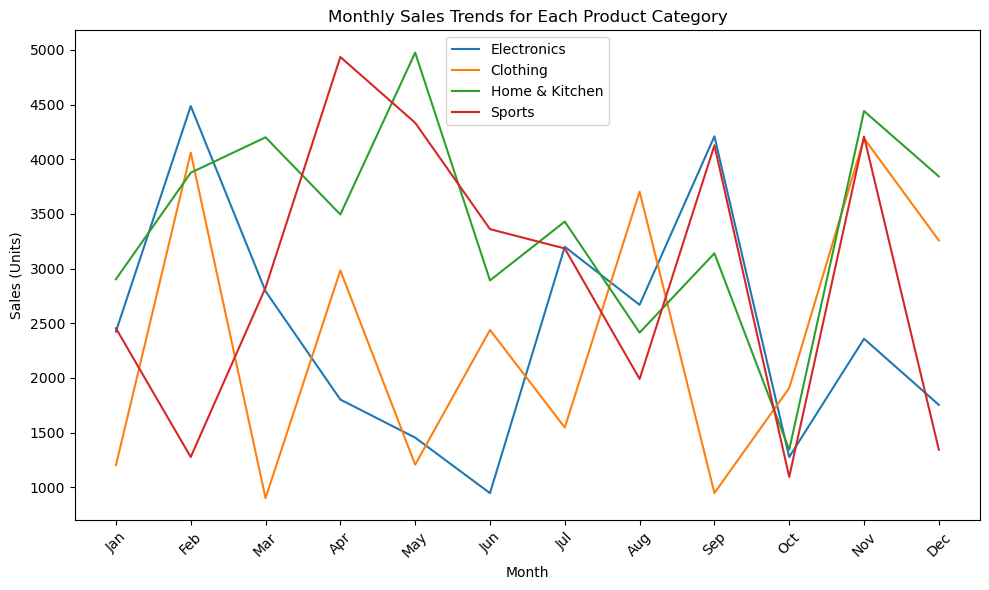

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in df_sales.columns[:-2]:  
    plt.plot(df_sales.index, df_sales[category], label=category)

plt.title('Monthly Sales Trends for Each Product Category')
plt.xlabel('Month')
plt.ylabel('Sales (Units)')
plt.legend()  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


2. Create the following plots:
 Box plots to show the sales distribtiƟon for each category

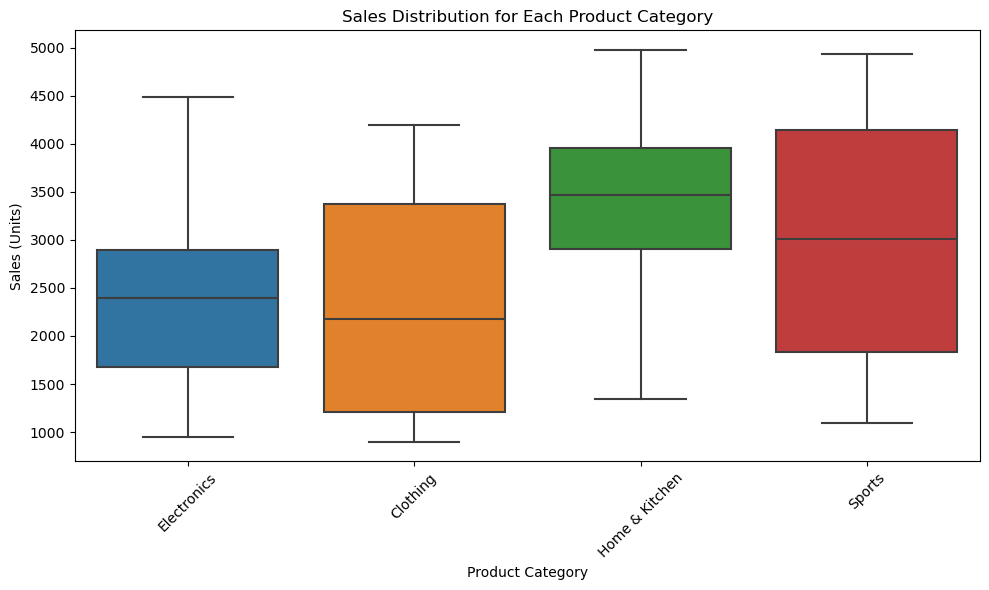

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales[columns]) 

plt.title('Sales Distribution for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales (Units)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
 i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th perctinƟle of ftaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DtiviaƟon oftflaƩened array, of each column, and
each row

In [41]:
import numpy as np

array = np.array([[1, -2, 3], [-4, 5, -6]])


In [43]:
#1. Element-wise absolute value of the array
abs_array = np.abs(array)
abs_array


array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
#2. Percentiles for the flattened array
percentiles_flat = np.percentile(array.flatten(), [25, 50, 75])

# Percentiles for each row
percentiles_row = np.percentile(array, [25, 50, 75], axis=1)

# Percentiles for each column
percentiles_column = np.percentile(array, [25, 50, 75], axis=0)

percentiles_flat, percentiles_row, percentiles_column


(array([-3.5, -0.5,  2.5]),
 array([[-0.5, -5. ],
        [ 1. , -4. ],
        [ 2. ,  0.5]]),
 array([[-2.75, -0.25, -3.75],
        [-1.5 ,  1.5 , -1.5 ],
        [-0.25,  3.25,  0.75]]))

In [47]:
#3. Mean, median, and standard deviation for the flattened array
mean_flat = np.mean(array.flatten())
median_flat = np.median(array.flatten())
std_flat = np.std(array.flatten())

# Mean, median, and standard deviation for each row
mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)

# Mean, median, and standard deviation for each column
mean_column = np.mean(array, axis=0)
median_column = np.median(array, axis=0)
std_column = np.std(array, axis=0)

mean_flat, median_flat, std_flat, mean_row, median_row, std_row, mean_column, median_column, std_column


(-0.5,
 -0.5,
 3.8622100754188224,
 array([ 0.66666667, -1.66666667]),
 array([ 1., -4.]),
 array([2.05480467, 4.78423336]),
 array([-1.5,  1.5, -1.5]),
 array([-1.5,  1.5, -1.5]),
 array([2.5, 3.5, 4.5]))

Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
 i. Find floor, ceiling and truncated value, rounded values)


In [49]:
import numpy as np

a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])


In [51]:
# Floor values (round down)
floor_values = np.floor(a)

# Ceiling values (round up)
ceiling_values = np.ceil(a)

# Truncated values (remove the fractional part)
truncated_values = np.trunc(a)

# Rounded values (round to the nearest integer)
rounded_values = np.round(a)

floor_values, ceiling_values, truncated_values, rounded_values


(array([-2., -2., -1.,  0.,  1.,  1.,  3.]),
 array([-1., -1., -0.,  1.,  2.,  2.,  3.]),
 array([-1., -1., -0.,  0.,  1.,  1.,  3.]),
 array([-2., -2., -0.,  0.,  2.,  2.,  3.]))

Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable. 

In [53]:
def swap_elements(lst, index1, index2):
    if index1 < len(lst) and index2 < len(lst):
        temp = lst[index1]
        lst[index1] = lst[index2]
        lst[index2] = temp
    else:
        print("Indices are out of range")
my_list = [10, 20, 30, 40, 50]
swap_elements(my_list, 1, 3)
print("Modified list:", my_list)


Modified list: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converting it to a list first.

In [57]:
def swap_elements_in_set(s, index1, index2):
    temp_list = list(s)
    if index1 < len(temp_list) and index2 < len(temp_list):
        temp_list[index1], temp_list[index2] = temp_list[index2], temp_list[index1]
        return set(temp_list)
    return s

my_set = {10, 20, 30, 40, 50}
modified_set = swap_elements_in_set(my_set, 1, 3)
print("Modified set:", modified_set)


Modified set: {40, 10, 50, 20, 30}
